In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2


In [ ]:
# # Define a seed
# np.random.seed(0)
# tf.random.set_seed(0)

# Dados distribuição normal

In [ ]:
# Cria um conjunto de dados fixo
x1_train = np.random.normal(size=(100, 1))
x2_train = np.random.normal(size=(100, 1))
y_train = np.random.choice([0, 1], size=(100,))

# Concatena as features em um único array
train_data = np.concatenate([x1_train, x2_train], axis=1)

# Definir a Rede Neural
model = Sequential([
    Dense(64, input_dim=2, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(64, activation='relu',kernel_regularizer=l2(0.5)),
    Dense(2, activation='linear')
])

# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo
model.fit(train_data, train_data, epochs=100, batch_size=8, verbose=0)

# Gera novos dados a partir de x1 e x2
x1_new = np.random.normal(size=(10, 1))
x2_new = np.random.normal(size=(10, 1))
new_data = np.concatenate([x1_new, x2_new], axis=1)

# Prediz novos dados
generated_data = model.predict(new_data)

entropy_scale = 0.5  # Ajuste este valor conforme necessário
noise = np.random.normal(loc=0, scale=entropy_scale, size=generated_data.shape)
generated_data_with_entropy = generated_data + noise

# Imprime os dados gerados
print(generated_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[ 0.10613992  0.78639656]
 [ 1.5766943   0.63664836]
 [-0.37971726  0.0760226 ]
 [-0.7233275   0.26596048]
 [-0.09513151  0.4992059 ]
 [-0.22711587  0.11748967]
 [-0.9136367   0.23346993]
 [-0.39981672 -0.04179704]
 [ 0.62230194 -0.38862145]
 [ 0.7736926  -0.6692926 ]]


In [ ]:
# Imprimir dados gerados com entropia
for i in range(len(new_data)):
    print(f"new_data[{i}]: {new_data[i]}")
    print(f"generated_data[{i}]: {generated_data[i]}")
    print(f"generated_data_with_entropy[{i}]: {generated_data_with_entropy[i]}")
    print()


new_data[0]: [0.07944976 0.91014034]
generated_data[0]: [0.10613992 0.78639656]
generated_data_with_entropy[0]: [1.18900228 0.78883046]

new_data[1]: [1.96694497 0.83402735]
generated_data[1]: [1.5766943  0.63664836]
generated_data_with_entropy[1]: [0.95216976 0.69949963]

new_data[2]: [-0.61239242 -0.14378558]
generated_data[2]: [-0.37971726  0.0760226 ]
generated_data_with_entropy[2]: [-0.99094536 -0.18927937]

new_data[3]: [-1.03951154  0.09404239]
generated_data[3]: [-0.7233275   0.26596048]
generated_data_with_entropy[3]: [-0.37446549  0.38371712]

new_data[4]: [-0.20651653  0.483608  ]
generated_data[4]: [-0.09513151  0.4992059 ]
generated_data_with_entropy[4]: [-0.02653033  0.18411675]

new_data[5]: [-0.41140548 -0.0707281 ]
generated_data[5]: [-0.22711587  0.11748967]
generated_data_with_entropy[5]: [-0.02890705  0.29962723]

new_data[6]: [-1.28843599  0.03023125]
generated_data[6]: [-0.9136367   0.23346993]
generated_data_with_entropy[6]: [-1.03538325  0.42162199]

new_data[7]

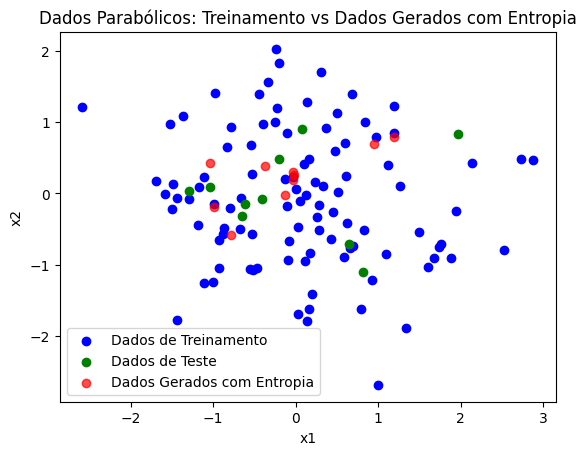

In [ ]:
# Plotar dados de treinamento originais
plt.scatter(train_data[:, 0], train_data[:, 1], label='Dados de Treinamento', color='b')

# Plotar dados de teste
plt.scatter(new_data[:, 0], new_data[:, 1], label='Dados de Teste', color='g')

# Plotar dados gerados com entropia
plt.scatter(generated_data_with_entropy[:, 0], generated_data_with_entropy[:, 1],
            label='Dados Gerados com Entropia', color='r', alpha=0.7)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados Parabólicos: Treinamento vs Dados Gerados com Entropia')
plt.legend()
plt.show()

# Dados parabólicos

In [ ]:
# Criação de dados parabólicos
x1 = np.linspace(-10, 10, 100).reshape(-1, 1)
x2 = 0.5 * x1**2 + np.random.normal(scale=2, size=x1.shape)  # x2 = 0.5 * x1^2 + ruído

# Concatenar as features em um único array
train_data = np.concatenate([x1, x2], axis=1)

# Definir a Rede Neural
model = Sequential([
    Dense(64, input_dim=2, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(64, activation='relu',kernel_regularizer=l2(0.5)),
    Dense(2, activation='linear')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(train_data, train_data, epochs=100, batch_size=8, verbose=0)

# Geração de novos dados a partir do formato parabólico
x1_new = np.linspace(-10, 10, 10).reshape(-1, 1)
x2_new = 0.5 * x1_new**2 + np.random.normal(scale=2, size=x1_new.shape)
new_data = np.concatenate([x1_new, x2_new], axis=1)

# Predizer novos dados
generated_data = model.predict(new_data)

# Adicionar entropia controlada aos dados gerados
# A escala do ruído pode ser ajustada para aumentar ou diminuir a variabilidade

entropy_scale = 0.8  # Ajuste este valor conforme necessário
noise = np.random.normal(loc=0, scale=entropy_scale, size=generated_data.shape)
generated_data_with_entropy = generated_data + noise

# Imprimir os dados gerados
print(generated_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[-1.0042941e+01  4.7854671e+01]
 [-7.8278756e+00  3.3318527e+01]
 [-5.5154262e+00  1.5107787e+01]
 [-3.2898226e+00  4.2793279e+00]
 [-1.0339953e+00 -2.5039272e-02]
 [ 1.1515121e+00  2.6596100e+00]
 [ 3.1132083e+00  3.8815308e+00]
 [ 5.5121069e+00  1.6089096e+01]
 [ 7.7932138e+00  2.9985729e+01]
 [ 1.0054560e+01  4.9107307e+01]]


In [ ]:
# Imprimir dados gerados com entropia
for i in range(len(new_data)):
    print(f"new_data[{i}]: {new_data[i]}")
    print(f"generated_data[{i}]: {generated_data[i]}")
    print(f"generated_data_with_entropy[{i}]: {generated_data_with_entropy[i]}")
    print()


new_data[0]: [-10.          48.13422485]
generated_data[0]: [-10.042941  47.85467 ]
generated_data_with_entropy[0]: [-9.90981147 48.98685359]

new_data[1]: [-7.77777778 33.43217731]
generated_data[1]: [-7.8278756 33.318527 ]
generated_data_with_entropy[1]: [-8.50384123 34.07594306]

new_data[2]: [-5.55555556 15.12975143]
generated_data[2]: [-5.515426 15.107787]
generated_data_with_entropy[2]: [-4.45077475 15.73405531]

new_data[3]: [-3.33333333  4.40360633]
generated_data[3]: [-3.2898226  4.279328 ]
generated_data_with_entropy[3]: [-3.53432162  2.91817142]

new_data[4]: [-1.11111111  0.36352337]
generated_data[4]: [-1.0339953  -0.02503927]
generated_data_with_entropy[4]: [-1.73075148  2.00415281]

new_data[5]: [1.11111111 2.868165  ]
generated_data[5]: [1.1515121 2.65961  ]
generated_data_with_entropy[5]: [1.00490572 2.66497551]

new_data[6]: [3.33333333 3.92785028]
generated_data[6]: [3.1132083 3.8815308]
generated_data_with_entropy[6]: [3.43949824 4.97577013]

new_data[7]: [ 5.555555

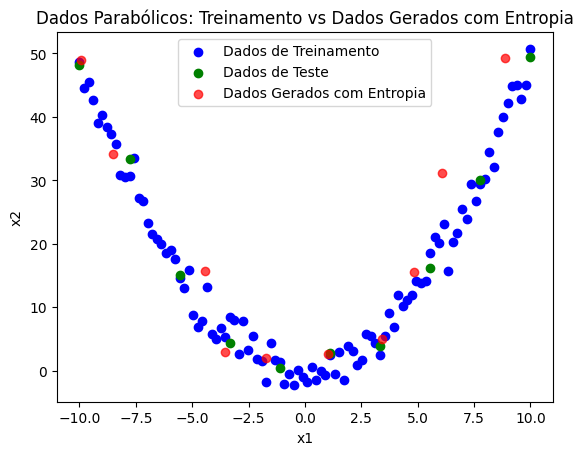

In [ ]:
# Plotar dados de treinamento originais
plt.scatter(train_data[:, 0], train_data[:, 1], label='Dados de Treinamento', color='b')

# Plotar dados de teste
plt.scatter(new_data[:, 0], new_data[:, 1], label='Dados de Teste', color='g')

# Plotar dados gerados com entropia
plt.scatter(generated_data_with_entropy[:, 0], generated_data_with_entropy[:, 1],
            label='Dados Gerados com Entropia', color='r', alpha=0.7)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados Parabólicos: Treinamento vs Dados Gerados com Entropia')
plt.legend()
plt.show()

# Função Senoidal

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


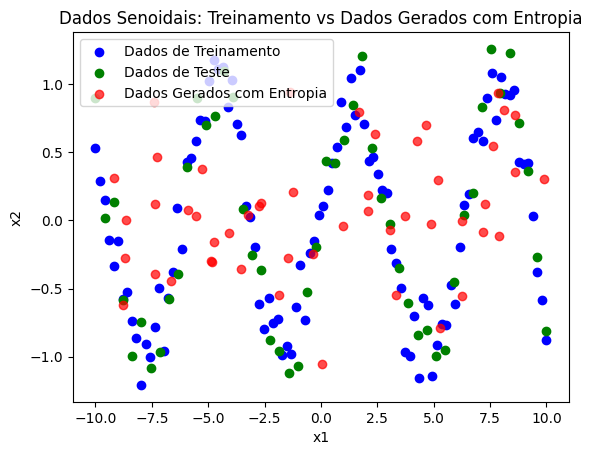

In [ ]:
# Criação de dados senoidais
x1 = np.linspace(-10, 10, 100).reshape(-1, 1)
x2 = np.sin(x1) + np.random.normal(scale=0.2, size=x1.shape)  # Adicionando ruído

# Concatenar as features em um único array
train_data = np.concatenate([x1, x2], axis=1)

# Definir a Rede Neural
model = Sequential([
    Dense(64, input_dim=2, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(2, activation='linear')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(train_data, train_data, epochs=100, batch_size=8, verbose=0)

# Geração de novos dados a partir do formato senoidal
x1_new = np.linspace(-10, 10, 50).reshape(-1, 1)
x2_new = np.sin(x1_new) + np.random.normal(scale=0.2, size=x1_new.shape)
new_data = np.concatenate([x1_new, x2_new], axis=1)

# Predizer novos dados
generated_data = model.predict(new_data)

# Adicionar entropia controlada aos dados gerados
entropy_scale = 0.4  # Ajuste este valor conforme necessário
noise = np.random.normal(loc=0, scale=entropy_scale, size=generated_data.shape)
generated_data_with_entropy = generated_data + noise

# Plotar dados de treinamento originais
plt.scatter(train_data[:, 0], train_data[:, 1], label='Dados de Treinamento', color='b')

# Plotar dados de teste
plt.scatter(new_data[:, 0], new_data[:, 1], label='Dados de Teste', color='g')

# Plotar dados gerados com entropia
plt.scatter(generated_data_with_entropy[:, 0], generated_data_with_entropy[:, 1],
            label='Dados Gerados com Entropia', color='r', alpha=0.7)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados Senoidais: Treinamento vs Dados Gerados com Entropia')
plt.legend()
plt.show()


# Função Espiral

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


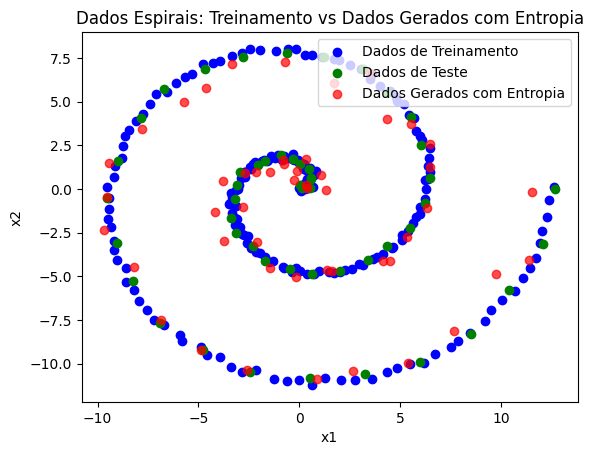

In [ ]:
# Criação de dados em espiral
theta = np.linspace(0, 4 * np.pi, 200)  # Ângulo da espiral
r = theta  # Raio que cresce linearmente
x1 = r * np.cos(theta) + np.random.normal(scale=0.1, size=theta.shape)
x2 = r * np.sin(theta) + np.random.normal(scale=0.1, size=theta.shape)

# Concatenar as features em um único array
train_data = np.vstack([x1, x2]).T

# Definir a Rede Neural
model = Sequential([
    Dense(64, input_dim=2, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.5)),
    Dense(2, activation='linear')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(train_data, train_data, epochs=100, batch_size=8, verbose=0)

# Geração de novos dados espirais
theta_new = np.linspace(0, 4 * np.pi, 50)
r_new = theta_new
x1_new = r_new * np.cos(theta_new) + np.random.normal(scale=0.1, size=theta_new.shape)
x2_new = r_new * np.sin(theta_new) + np.random.normal(scale=0.1, size=theta_new.shape)
new_data = np.vstack([x1_new, x2_new]).T

# Predizer novos dados
generated_data = model.predict(new_data)

# Adicionar entropia controlada aos dados gerados
entropy_scale = 0.4  # Ajuste este valor conforme necessário
noise = np.random.normal(loc=0, scale=entropy_scale, size=generated_data.shape)
generated_data_with_entropy = generated_data + noise

# Plotar dados de treinamento originais
plt.scatter(train_data[:, 0], train_data[:, 1], label='Dados de Treinamento', color='b')

# Plotar dados de teste
plt.scatter(new_data[:, 0], new_data[:, 1], label='Dados de Teste', color='g')

# Plotar dados gerados com entropia
plt.scatter(generated_data_with_entropy[:, 0], generated_data_with_entropy[:, 1],
            label='Dados Gerados com Entropia', color='r', alpha=0.7)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados Espirais: Treinamento vs Dados Gerados com Entropia')
plt.legend()
plt.show()

# Teste com BD real

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')
pasta_google_drive = '/content/drive/MyDrive/Colab Notebooks/'

# Caminho para o arquivo BD ORIGINAL
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/BD_para_teste_trab_alfredo.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


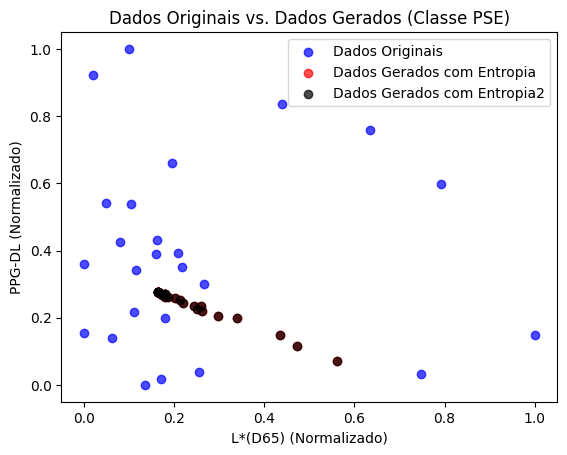

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle

# 1. Carregar a planilha
data = pd.read_excel(caminho_arquivo)

# 2. Filtrar a classe PSE
data_pse = data[data['Classe'] == 'PSE']

# 3. Selecionar as features de interesse
features = data_pse[['L*(D65)', 'PPG-DL']].values

# 4. Normalizar os dados (opcional, mas recomendado para RNA)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# 5. Configurar a Rede Neural
model = Sequential([
    Dense(10, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='linear')  # Geração de novos valores (x e y)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 1. Embaralhar os dados antes de treinar
features_normalized, features_normalized_shuffled = shuffle(features_normalized, features_normalized)

# 2. Treinar a Rede Neural com os dados embaralhados
model.fit(features_normalized, features_normalized_shuffled, epochs=100, batch_size=8, verbose=0)

# # 6. Treinar a Rede Neural (utilizando os próprios dados como saída)
# model.fit(features_normalized, features_normalized, epochs=100, batch_size=8, verbose=0)

# 7. Gerar novos dados baseados nas features da classe PSE
generated_data = model.predict(features_normalized)
generated_data2 = model.predict(features_normalized)

# # 8. Adicionar entropia controlada
# entropy_scale = 0.5  # Ajuste conforme necessário
# noise = np.random.normal(loc=0, scale=entropy_scale, size=generated_data.shape)
# generated_data_with_entropy = generated_data + noise

generated_data_with_entropy = generated_data
generated_data_with_entropy2 = generated_data2

# 9. Visualizar os dados
plt.scatter(features_normalized[:, 0], features_normalized[:, 1], label='Dados Originais', color='b', alpha=0.7)
plt.scatter(generated_data_with_entropy[:, 0], generated_data_with_entropy[:, 1],
            label='Dados Gerados com Entropia', color='r', alpha=0.7)
plt.scatter(generated_data_with_entropy2[:, 0], generated_data_with_entropy2[:, 1],
            label='Dados Gerados com Entropia2', color='k', alpha=0.7)
plt.xlabel('L*(D65) (Normalizado)')
plt.ylabel('PPG-DL (Normalizado)')
plt.title('Dados Originais vs. Dados Gerados (Classe PSE)')
plt.legend()
plt.show()


# Descarte

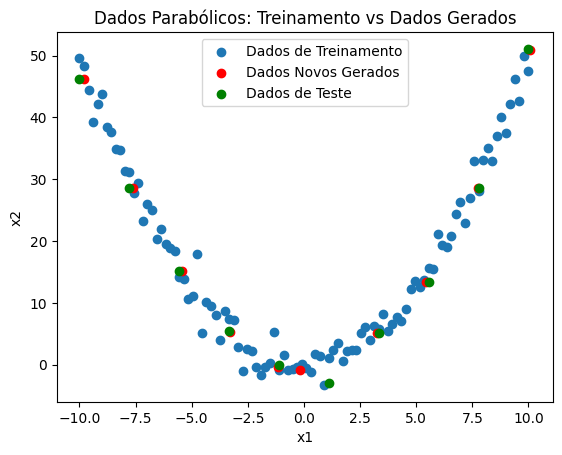

In [ ]:
# Plotar dados de treinamento originais
plt.scatter(train_data[:, 0], train_data[:, 1], label='Dados de Treinamento')

# Plotar novos dados gerados
plt.scatter(generated_data[:, 0], generated_data[:, 1], label='Dados Novos Gerados', color='r')

# Plotar dados de teste
plt.scatter(new_data[:, 0], new_data[:, 1], label='Dados de Teste', color='g')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados Parabólicos: Treinamento vs Dados Gerados')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Dimensão do espaço latente
latent_dim = 2

# Encoder: reduz os dados para o espaço latente
input_data = Input(shape=(2,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(64, activation='relu')(encoded)
latent_space = Dense(latent_dim, activation='linear', name='latent_space')(encoded)

# Decoder: reconstrói os dados a partir do espaço latente
decoded = Dense(64, activation='relu')(latent_space)
decoded = Dense(64, activation='relu')(decoded)
output_data = Dense(2, activation='linear')(decoded)

# Modelo completo (Autoencoder)
autoencoder = Model(input_data, output_data)

# Modelo do encoder para acessar o espaço latente
encoder = Model(input_data, latent_space)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
autoencoder.fit(train_data, train_data, epochs=100, batch_size=8, verbose=0)


In [ ]:
# Mapear dados para o espaço latente
latent_representations = encoder.predict(new_data)

# Adicionar perturbação no espaço latente
perturbation = np.random.normal(scale=0.9, size=latent_representations.shape)  # Ajuste o scale para mais/menos variabilidade
perturbed_latent = latent_representations + perturbation


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
# Definir o decoder
latent_input = Input(shape=(latent_dim,))
decoder_layer = autoencoder.layers[-3](latent_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoded_output = autoencoder.layers[-1](decoder_layer)
decoder = Model(latent_input, decoded_output)

# Reconstruir dados a partir do espaço latente perturbado
generated_data = decoder.predict(perturbed_latent)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


new_data[0]: [-10.          51.05809048]
generated_data[0]: [-10.77309  50.30111]

new_data[1]: [-7.77777778 31.09217082]
generated_data[1]: [-8.268787 31.53922 ]

new_data[2]: [-5.55555556 12.71253731]
generated_data[2]: [-5.559328 12.706054]

new_data[3]: [-3.33333333  5.47275393]
generated_data[3]: [-3.7035728  6.361421 ]

new_data[4]: [-1.11111111 -0.89845777]
generated_data[4]: [-1.7214124 -0.6553036]

new_data[5]: [1.11111111 0.51711576]
generated_data[5]: [ 0.16202924 -1.1079669 ]

new_data[6]: [3.33333333 3.7607537 ]
generated_data[6]: [4.305593  3.1348515]

new_data[7]: [ 5.55555556 18.0570395 ]
generated_data[7]: [ 5.5144286 17.17335  ]

new_data[8]: [ 7.77777778 28.5289688 ]
generated_data[8]: [ 7.854594 28.517641]

new_data[9]: [10.         48.20211569]
generated_data[9]: [ 9.83973 47.55316]



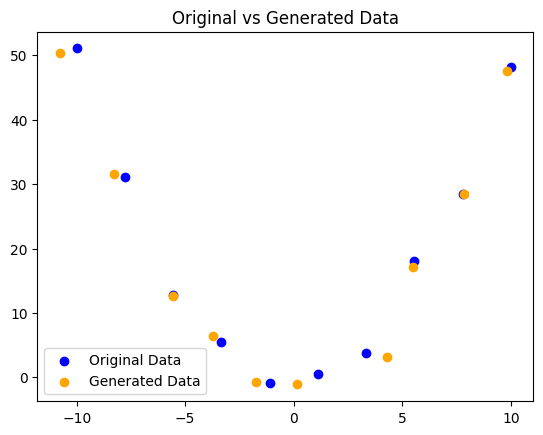

In [ ]:
# Comparar dados novos e gerados
for i in range(len(new_data)):
    print(f"new_data[{i}]: {new_data[i]}")
    print(f"generated_data[{i}]: {generated_data[i]}")
    print()

# Plotar os dados originais e os gerados
plt.scatter(new_data[:, 0], new_data[:, 1], label='Original Data', c='blue')
plt.scatter(generated_data[:, 0], generated_data[:, 1], label='Generated Data', c='orange')
plt.legend()
plt.title('Original vs Generated Data')
plt.show()
